In [1]:
# Length Equivalencies (Spectral equivalency)

# X-rays have wavelength in the range of 0.01 to 10 nm

import astropy.units as u
length = 1 * u.nm
length

length.to(u.keV, equivalencies=u.spectral())

<Quantity 1.23984198 keV>

In [3]:
# Earth's position relative to the Sun on that day.

from sunpy.coordinates import get_earth

earth_position = get_earth("2013-10-28")
print(earth_position)


<SkyCoord (HeliographicStonyhurst: obstime=2013-10-28T00:00:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (0., 4.77115706, 0.99362769)>


In [4]:
# Converts length from a physical unit into an angular size(arcseconds) and that tells how arge a 1000 km object appears in the sky when viewed from Earth.

import astropy.units as u
from sunpy.coordinates import get_earth
from sunpy.coordinates.utils import solar_angle_equivalency

length = 1000 * u.km  # Example: a 1000 km object
angle = length.to(u.arcsec, equivalencies=solar_angle_equivalency(get_earth("2013-10-28")))

print(angle)

INFO: Apparent body location accounts for 495.82 seconds of light travel time [sunpy.coordinates.ephemeris]
1.3876374830434628 arcsec


In [5]:
# Physical size of a solar feature (e.g., a sunspot, a flare, or a coronal mass ejection), we can calculate its apparent size in arcseconds as seen from Earth.

# This code is converting a physical length (e.g., in meters) into an angular size (arcseconds) as seen from Earth on October 28, 2013.

from sunpy.coordinates import get_earth
from sunpy.coordinates.utils import solar_angle_equivalency
import astropy.units as u

length = 1000 * u.km  # Example: a 1000 km object
length.to(u.arcsec, equivalencies=solar_angle_equivalency(get_earth("2013-10-28")))

INFO: Apparent body location accounts for 495.82 seconds of light travel time [sunpy.coordinates.ephemeris]


<Quantity 1.38763748 arcsec>

In [8]:
# Solar data is associated with a number of different time formats.
# To handle all these formats, sunpy has sunpy.time.parse_time() that accepts a variety of inputs, and returns a consistent Time object. 

from sunpy.time import parse_time

parse_time('2007-05-04T21:08:12')
parse_time(894316092.00000000, format='utime') #The number 894316092.00000000 is the number of seconds (UNIX time) since 1979-01-01 00:00:00 UTC.

<Time object: scale='utc' format='utime' value=894316092.0>

In [16]:
## TIME RANGE ##

from sunpy.time import TimeRange

import astropy.units as u

time_range = TimeRange('2010/03/04 00:10', 600 * u.second)
time_range           # Calling the varaible
time_range.center    # Gives the mid value of time interval range
time_range.seconds   # Gives time in seconds
time_range.split(2)  # split in 2 equal lengths

[   <sunpy.time.timerange.TimeRange object at 0x7f59b31f5be0>
     Start: 2010-03-04 00:10:00
     End:   2010-03-04 00:15:00
     Center:2010-03-04 00:12:30
     Duration:0.00347222222222221 days or
            0.08333333333333304 hours or
            4.999999999999982 minutes or
            299.9999999999989 seconds,
     Start: 2010-03-04 00:15:00
     End:   2010-03-04 00:20:00
     Center:2010-03-04 00:17:30
     Duration:0.00347222222222221 days or
            0.08333333333333304 hours or
            4.999999999999982 minutes or
            299.9999999999989 seconds]

In [ ]:
##   COORDINATES   ##

# Different Coordinate Systems (FRAMES) in SunPy are 
#         1) Helioprojective (HPC)  --  Earth based
#         2) Heliocentric (HC)  --  Measuring distances from Sun’s center       
#         3) HEliographic stonyhurst (HGS)  --  Features on the Sun’s surface (latitude/longitude)
#         4) Heliographic Carrington (HGC)  --  Tracking features with solar rotation
#         5) Heliocentric Inertial (HCI)   --  Spacecraft motion in the solar system
#         6) Geocentric Solar Ecliptic (GSE)  --  Space weather forecasting







In [17]:
#  To represent a point on the Sun  

from astropy.coordinates import SkyCoord
import astropy.units as u
from sunpy.coordinates import frames

coord = SkyCoord(70*u.deg, -30*u.deg, obstime="2017-08-01",
                 frame=frames.HeliographicStonyhurst)
coord

<SkyCoord (HeliographicStonyhurst: obstime=2017-08-01T00:00:00.000, rsun=695700.0 km): (lon, lat) in deg
    (70., -30.)>

In [19]:
# To transform from the original Stonyhurst frame to a Helioprojective frame:

# The coordinates are converted as seen from Earth’s perspective, This is useful when working with solar images from SDO, SOHO, Hinode.

from astropy.coordinates import SkyCoord
import astropy.units as u
from sunpy.coordinates import frames

coord = SkyCoord(70*u.deg, -30*u.deg, obstime="2017-08-01",
                 frame=frames.HeliographicStonyhurst)
coord.transform_to(frames.Helioprojective(observer="earth"))


<SkyCoord (Helioprojective: obstime=2017-08-01T00:00:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate for 'earth'>): (Tx, Ty, distance) in (arcsec, arcsec, km)
    (769.96270814, -498.89715922, 1.51668773e+08)>

In [21]:
# Converting it into ICRS coordinates (Right Ascension and Declination).
# Which tells us where the Sun or a solar feature appears in the night sky when viewed from Earth.

import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames
from sunpy.time import parse_time

# Define observation time
obs_time = parse_time("2023-02-01T12:00:00")  # Example date

# Define a coordinate in Heliographic Stonyhurst (HGS) with obstime
coord = SkyCoord(lon=30*u.deg, lat=20*u.deg, radius=1*u.R_sun, 
                 frame=frames.HeliographicStonyhurst, obstime=obs_time)

# Convert to ICRS
icrs_coord = coord.transform_to('icrs')

print(icrs_coord)



<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, solRad)
    (179.57696776, 11.32318848, 2.83823832)>


In [22]:
# SkyCoord and all coordinate frames support array coordinates. These work the same as single-value coordinates, but they store multiple coordinates in a single object.
# When you’re going to apply the same operation to many different coordinates, this is a better choice than a list of SkyCoord objects, because it will be much faster than applying the operation to each SkyCoord in a for loop:

import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames

# Define two coordinates in Helioprojective (HPC)
coord = SkyCoord([-500, 400]*u.arcsec,  # Solar-X positions
                 [100, 200]*u.arcsec,   # Solar-Y positions
                 frame=frames.Helioprojective)

# Accessing the first coordinate
coord[0]
 
 

<SkyCoord (Helioprojective: obstime=None, rsun=695700.0 km, observer=None): (Tx, Ty) in arcsec
    (-500., 100.)>

In [1]:
# Loading a sample solar image (AIA_171_IMAGE)and suppressing specific warnings related to FITS file verification.
# It creates a sunpy.map.Map object containing the image and its metadata.
#  It retrieves the coordinate frame of the image.



import warnings

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io.fits.verify import VerifyWarning

import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE  


# This ensures that any VerifyWarning messages from loading the FITS file are ignored.

with warnings.catch_warnings():                              # Temporarily captures warning messages.
    warnings.simplefilter("ignore", category=VerifyWarning)  # Suppresses VerifyWarning messages related to FITS file verification.
    amap = sunpy.map.Map(AIA_171_IMAGE)                      # Loads the sample AIA 171 Å image into a sunpy.map.Map object.
amap.coordinate_frame                                        # Retrieves the coordinate frame associated with the image.   
 
 # amap: This variable holds the solar image data, including metadata, coordinate information, and pixel values.
 # Output is a SkyCoord object representing the coordinate frame of the solar image.

<Helioprojective Frame (obstime=2011-06-07T06:33:02.880, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:02.880, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00406429, 0.04787238, 1.51846026e+11)>)>

In [4]:
import warnings

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io.fits.verify import VerifyWarning

import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE  

with warnings.catch_warnings():                              # Temporarily captures warning messages.
    warnings.simplefilter("ignore", category=VerifyWarning)  # Suppresses VerifyWarning messages related to FITS file verification.
    amap = sunpy.map.Map(AIA_171_IMAGE)                      # Loads the sample AIA 171 Å image into a sunpy.map.Map object.
amap.coordinate_frame 
coord = SkyCoord(100 * u.arcsec, 10*u.arcsec, frame=amap.coordinate_frame)  

coord  

pixels = amap.wcs.world_to_pixel(coord)  # Converts celestial coordinates (coord) from the world coordinate system (WCS) (i.e., solar physical coordinates in arcseconds) to pixel coordinates in the image.
pixels  


(array(551.7680511), array(515.18266871))

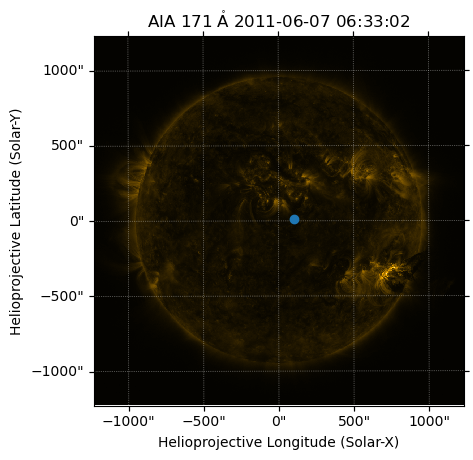

In [ ]:
# Plotting the Solar Image and a Coordinate

import warnings

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io.fits.verify import VerifyWarning

import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE  
import matplotlib.pyplot as plt

with warnings.catch_warnings():                              # Temporarily captures warning messages.
    warnings.simplefilter("ignore", category=VerifyWarning)  # Suppresses VerifyWarning messages related to FITS file verification.
    amap = sunpy.map.Map(AIA_171_IMAGE)                      # Loads the sample AIA 171 Å image into a sunpy.map.Map object.
amap.coordinate_frame 
coord = SkyCoord(100 * u.arcsec, 10*u.arcsec, frame=amap.coordinate_frame)  

fig = plt.figure()                   # Creating a Figure

ax = plt.subplot(projection=amap)    # Setting Up an Axis Using the SunPy Map's Projection

amap.plot()                          # Ploting the Solar Image

ax.plot_coord(coord, 'o')            # Marking a Specific Coordinate on image
